<a href="https://colab.research.google.com/github/amitdoda1983/EVA-Session-5/blob/master/Image_Norm_BN_L2_Amit_Doda_M6_Session_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Libraries and modules

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


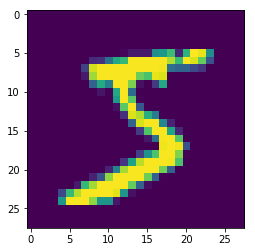

In [356]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [357]:
print (X_train.mean(),X_train.std())

33.318421449829934 78.56748998339798


In [358]:
print (X_test.mean(),X_test.std())

33.791224489795916 79.17246322228644


In [0]:
train_X= X_train
test_X = X_test

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Model with Image Normalization

In [369]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=33.318 (78.567), test=33.791 (79.172)
(64, 28, 28, 1) 0.041031793 1.0454384
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


In [0]:
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()
                        

In [371]:
batch_testX.shape

(10000, 28, 28, 1)

In [372]:
batch_testX.mean()

0.0060174568

In [373]:
batch_testX.std()

1.0077008

Reshape the input to have the dimension for channel

In [0]:
X_train = batchX
X_test = batch_testX

In [0]:
y_train=batchy
y_test=batch_testy

One hot encoding for output variable

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [377]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D,AveragePooling2D,Dropout,BatchNormalization
import keras.callbacks
from keras.callbacks import *
model = Sequential()

 

model.add(Convolution2D(8, (3, 3),activation='relu', input_shape=(28,28,1)))
                               # Global Receptive field (3,3), output channel size =(26,26,8)
#model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3),activation='relu'))
                               # Global Receptive field (5,5), output channel size =(24,24,16)
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(MaxPooling2D(pool_size = (2, 2)))
                               # Global Receptive field (10,10), output channel size =(12,12,16)
  
model.add(Convolution2D(16, (3, 3),activation='relu'))
                               # Global Receptive field (12,12), output channel size =(10,10,16)
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(MaxPooling2D(pool_size = (2, 2)))
                               # Global Receptive field (24,24), output channel size =(5,5,16)
  
model.add(Convolution2D(32, (3,3),activation='relu'))
                               # Global Receptive field (26,26), output channel size =(3,3,32)
#model.add(BatchNormalization())


model.add(Convolution2D(10, 1, activation='relu'))
                               # Global Receptive field (26,26), output channel size =(3,3,10)
model.add(BatchNormalization())
                      
model.add(AveragePooling2D(pool_size = (3, 3)))
#model.add(Convolution2D(10, 3))
                               # Global Receptive field (28,28), output channel size =(1,1,10)
model.add(Flatten())
model.add(Activation('softmax'))

### 8,706 Parameters

In [183]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_70 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_47 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 10, 10, 16)        2320      
_________________________________________________________________
batch_normalization_71 (Batc (None, 10, 10, 16)        64        
__________

In [0]:
checkpointer = ModelCheckpoint(filepath='model_best5.h5', monitor='val_loss', mode='auto', verbose = 1, save_best_only=True)
lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=0.5, cooldown=0, patience=4, min_lr=0.5e-9,verbose = 1)

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [186]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=40, verbose=1,validation_data=(X_test, Y_test),callbacks=[checkpointer,lr_reducer])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 13s 213us/step - loss: 0.6021 - acc: 0.9032 - val_loss: 0.2621 - val_acc: 0.9660

Epoch 00001: val_loss improved from inf to 0.26211, saving model to model_best5.h5
Epoch 2/40
60000/60000 [==============================] - 9s 146us/step - loss: 0.1782 - acc: 0.9729 - val_loss: 0.2109 - val_acc: 0.9687

Epoch 00002: val_loss improved from 0.26211 to 0.21094, saving model to model_best5.h5
Epoch 3/40
60000/60000 [==============================] - 8s 135us/step - loss: 0.1140 - acc: 0.9787 - val_loss: 0.1137 - val_acc: 0.9840

Epoch 00003: val_loss improved from 0.21094 to 0.11372, saving model to model_best5.h5
Epoch 4/40
60000/60000 [==============================] - 8s 130us/step - loss: 0.0845 - acc: 0.9822 - val_loss: 0.1023 - val_acc: 0.9796

Epoch 00004: val_loss improved from 0.11372 to 0.10231, saving model to model_best5.h5
Epoch 5/40
60000/60000 [=========================

## The validation accuracy achieved is 99.41


In [0]:
model=keras.models.load_model('model_best5.h5')


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [189]:
print(score)

[0.020946532106027007, 0.9941]


### Model with Image Normalization &  Relu after BN


In [0]:
from keras.layers import Activation, MaxPooling2D,AveragePooling2D,Dropout,BatchNormalization
from keras import regularizers
import keras.callbacks
from keras.callbacks import *
model = Sequential()

 

model.add(Convolution2D(8, (3, 3),activation='relu', input_shape=(28,28,1)))
                               # Global Receptive field (3,3), output channel size =(26,26,8)
#model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3)))
                               # Global Receptive field (5,5), output channel size =(24,24,16)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(MaxPooling2D(pool_size = (2, 2)))
                               # Global Receptive field (10,10), output channel size =(12,12,16)
  
model.add(Convolution2D(16, (3, 3)))
                               # Global Receptive field (12,12), output channel size =(10,10,16)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(MaxPooling2D(pool_size = (2, 2)))
                               # Global Receptive field (24,24), output channel size =(5,5,16)
  
model.add(Convolution2D(32, (3,3),activation='relu'))
                               # Global Receptive field (26,26), output channel size =(3,3,32)
#model.add(BatchNormalization())


model.add(Convolution2D(10, 1))
                               # Global Receptive field (26,26), output channel size =(3,3,10)
model.add(BatchNormalization())
model.add(Activation('relu'))
                      
model.add(AveragePooling2D(pool_size = (3, 3)))
#model.add(Convolution2D(10, 3))
                               # Global Receptive field (28,28), output channel size =(1,1,10)
model.add(Flatten())
model.add(Activation('softmax'))

In [238]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_97 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_86 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 10, 10, 16)        2320      
__________

In [0]:
checkpointer = ModelCheckpoint(filepath='model_best2.h5', monitor='val_loss', mode='auto', verbose = 1, save_best_only=True)
lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=0.5, cooldown=0, patience=4, min_lr=0.5e-9,verbose = 1)

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [241]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=40, verbose=1,validation_data=(X_test, Y_test),callbacks=[checkpointer,lr_reducer])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 17s 289us/step - loss: 0.6828 - acc: 0.9135 - val_loss: 0.4399 - val_acc: 0.9615

Epoch 00001: val_loss improved from inf to 0.43993, saving model to model_best2.h5
Epoch 2/40
60000/60000 [==============================] - 9s 142us/step - loss: 0.2124 - acc: 0.9719 - val_loss: 0.2320 - val_acc: 0.9810

Epoch 00002: val_loss improved from 0.43993 to 0.23196, saving model to model_best2.h5
Epoch 3/40
60000/60000 [==============================] - 8s 142us/step - loss: 0.1327 - acc: 0.9784 - val_loss: 0.1703 - val_acc: 0.9820

Epoch 00003: val_loss improved from 0.23196 to 0.17033, saving model to model_best2.h5
Epoch 4/40
60000/60000 [==============================] - 9s 143us/step - loss: 0.0986 - acc: 0.9819 - val_loss: 0.1212 - val_acc: 0.9850

Epoch 00004: val_loss improved from 0.17033 to 0.12118, saving model to model_best2.h5
Epoch 5/40
60000/60000 [=========================

## The validation accuracy achieved is 99.55

In [242]:
model=keras.models.load_model('model_best2.h5')
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.025459150733426212, 0.995]



I observed that the model is giving beter results and converging faster.

### Model with Image Normalization , Relu after BN & L2 Regularizer

In [0]:
from keras.layers import Activation, MaxPooling2D,AveragePooling2D,Dropout,BatchNormalization
from keras import regularizers
import keras.callbacks
from keras.callbacks import *
model = Sequential()

 

model.add(Convolution2D(8, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.0000001)))
                               # Global Receptive field (3,3), output channel size =(26,26,8)
#model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3),kernel_regularizer=regularizers.l2(0.0000001)))
                               # Global Receptive field (5,5), output channel size =(24,24,16)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(MaxPooling2D(pool_size = (2, 2)))
                               # Global Receptive field (10,10), output channel size =(12,12,16)
  
model.add(Convolution2D(16, (3, 3),kernel_regularizer=regularizers.l2(0.0000001)))
                               # Global Receptive field (12,12), output channel size =(10,10,16)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(MaxPooling2D(pool_size = (2, 2)))
                               # Global Receptive field (24,24), output channel size =(5,5,16)
  
model.add(Convolution2D(32, (3,3),activation='relu',kernel_regularizer=regularizers.l2(0.0000001)))
                               # Global Receptive field (26,26), output channel size =(3,3,32)
#model.add(BatchNormalization())


model.add(Convolution2D(10, 1,kernel_regularizer=regularizers.l2(0.0000001)))
                               # Global Receptive field (26,26), output channel size =(3,3,10)
model.add(BatchNormalization())
model.add(Activation('relu'))
                      
model.add(AveragePooling2D(pool_size = (3, 3)))
#model.add(Convolution2D(10, 3))
                               # Global Receptive field (28,28), output channel size =(1,1,10)
model.add(Flatten())
model.add(Activation('softmax'))

In [448]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_263 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_154 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
activation_162 (Activation)  (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_103 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_265 (Conv2D)          (None, 10, 10, 16)        2320      
__________

In [0]:
checkpointer = ModelCheckpoint(filepath='model_best3.h5', monitor='val_acc', mode='auto', verbose = 1, save_best_only=True)
lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=0.5, cooldown=0, patience=4, min_lr=0.5e-9,verbose = 1)

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [451]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=40, verbose=1,validation_data=(X_test, Y_test),callbacks=[checkpointer,lr_reducer])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 31s 512us/step - loss: 0.6998 - acc: 0.9097 - val_loss: 0.4399 - val_acc: 0.9676

Epoch 00001: val_acc improved from -inf to 0.96760, saving model to model_best3.h5
Epoch 2/40
60000/60000 [==============================] - 11s 186us/step - loss: 0.2175 - acc: 0.9733 - val_loss: 0.2528 - val_acc: 0.9773

Epoch 00002: val_acc improved from 0.96760 to 0.97730, saving model to model_best3.h5
Epoch 3/40
60000/60000 [==============================] - 11s 186us/step - loss: 0.1351 - acc: 0.9788 - val_loss: 0.1853 - val_acc: 0.9810

Epoch 00003: val_acc improved from 0.97730 to 0.98100, saving model to model_best3.h5
Epoch 4/40
60000/60000 [==============================] - 11s 182us/step - loss: 0.1008 - acc: 0.9822 - val_loss: 0.1312 - val_acc: 0.9856

Epoch 00004: val_acc improved from 0.98100 to 0.98560, saving model to model_best3.h5
Epoch 5/40
60000/60000 [=========================

In [452]:
model=keras.models.load_model('model_best3.h5')
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.030993917743116616, 0.9934]


In [0]:
predict=model.predict_classes(X_test)

In [0]:
incorrects = np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test)
incorrects=incorrects[0]
incorrects=incorrects.tolist()

### 25 Misclassified Images

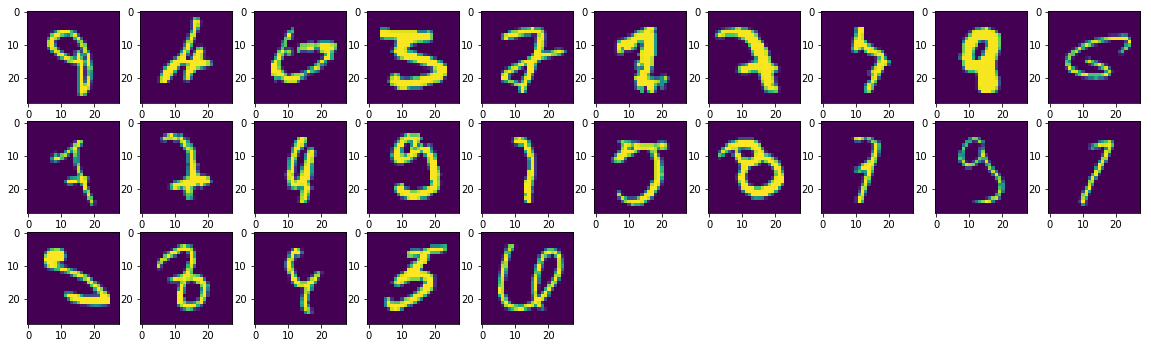

In [459]:
fig=plt.figure(figsize=(20,20))
rows=10
columns = 10
i=0
for j in (incorrects):
  if i <25:
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(test_X[j])
    i=i+1
plt.show()